<a href="https://colab.research.google.com/github/Willgnner-Santos/LLM_PortugueseLegalDocClassifier/blob/main/Mixtral/Mixtral_8x22B_Instruct_v0_1_Centroids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install tiktoken langchain-community langchainhub langchain_openai langchain

from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate

api_key = ''

llm = ChatOpenAI(
                api_key= api_key,
                base_url="https://api.together.xyz/v1",
                model='mistralai/Mixtral-8x22B-Instruct-v0.1',
                max_tokens=100,
                temperature=0.1,
                verbose=True
                )

def get_label(result):
    return result.content

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PROMPT_CLASSIFICACAO = (
    "Classifique as petições processuais abaixo em uma das seguintes categorias: "
    "AGRAVO, CONTRARRAZOES-AO-AGRAVO, EMBARGOS, EXTINCAO-DE-PUNIBILIDADE, "
    "HABEAS-CORPUS, IMPUGNACAO, INDULTO-COMUTACAO, INTIMACAO-NEGATIVA, "
    "LIVRAMENTO-CONDICIONAL, OFICIOS, PROGRESSAO-DE-REGIME, REMICAO-DE-PENA, "
    "TRANSFERENCIA-DE-EXECUCAO, UNIFICACAO-DE-PENAS, APELACAO, REGISTRO-CIVIL, "
    "CUMPRIMENTO-DE-SETENCA, INDENIZATORIAS, EXCECAO-DE-PRE-EXECUTIVIDADE, "
    "DISSOLUCAO-DE-CONDOMINIO, CONSIGNACAO-EM-PAGAMENTO, ALVARA-JUDICIAL-LIBERACAO-DE-CORPO, "
    "SAIDA-TEMPORARIA, USUCAPIAO. "
    "Retorne apenas a categoria e nada mais. "
    "Texto: {texto} "
    "Categoria:"
)

PROMPT_RESUMO = (
    "Faça um resumo explicativo de 200 palavras da petição abaixo, o resumo deve descrever sobre o que o texto fala de modo geral, "
    "ignorando pessoas, números, locais, ou especificidades que não definem a ideia da petição, permitindo a classificação da petição "
    "entre as seguintes classes: AGRAVO, CONTRARRAZOES-AO-AGRAVO, EMBARGOS, EXTINCAO-DE-PUNIBILIDADE, "
    "HABEAS-CORPUS, IMPUGNACAO, INDULTO-COMUTACAO, INTIMACAO-NEGATIVA, "
    "LIVRAMENTO-CONDICIONAL, OFICIOS, PROGRESSAO-DE-REGIME, REMICAO-DE-PENA, "
    "TRANSFERENCIA-DE-EXECUCAO, UNIFICACAO-DE-PENAS, APELACAO, REGISTRO-CIVIL, "
    "CUMPRIMENTO-DE-SETENCA, INDENIZATORIAS, EXCECAO-DE-PRE-EXECUTIVIDADE, "
    "DISSOLUCAO-DE-CONDOMINIO, CONSIGNACAO-EM-PAGAMENTO, ALVARA-JUDICIAL-LIBERACAO-DE-CORPO, "
    "SAIDA-TEMPORARIA, USUCAPIAO. "
    "Retorne apenas o resumo explicativo e nada mais. "
    "---------------------- "
    "Petição de {classe}: {texto}"
    "Resumo Explicativo:"
)

PROMPT_DESCRICAO = (
    "Classifique a petição processual nas seguintes categorias: "
    "- AGRAVO: Petições que contestam decisões judiciais, solicitando a revisão dessas decisões, geralmente por inconformidade com a decisão proferida em primeira instância. "
    "- CONTRARRAZOES-AO-AGRAVO: Petições que apresentam argumentos contrários a um agravo interposto, defendendo a manutenção da decisão judicial atacada e refutando os pontos levantados pelo agravante. "
    "- EMBARGOS: Petições que visam esclarecer ou corrigir omissões, contradições ou obscuridades em decisões judiciais, buscando a perfeita compreensão e aplicação da decisão. "
    "- EXTINCAO-DE-PUNIBILIDADE: Petições que tratam da extinção da punibilidade de uma pena por razões como prescrição, anistia, perdão judicial ou cumprimento integral da pena imposta. "
    "- HABEAS-CORPUS: Petições que visam garantir a liberdade de um indivíduo, alegando prisão ilegal ou abuso de poder, e buscando a concessão do benefício de soltura imediata. "
    "- IMPUGNACAO: Petições que questionam a precisão de relatórios ou decisões processuais, solicitando correções específicas para assegurar a justiça e a veracidade dos documentos processuais. "
    "- INDULTO-COMUTACAO: Petições que solicitam a comutação ou redução de pena com base em decretos presidenciais, leis específicas ou outros fundamentos legais que justifiquem o benefício. "
    "- INTIMACAO-NEGATIVA: Petições que tratam da intimação do sentenciado que não foi localizado, solicitando nova tentativa de intimação ou a adoção de outras medidas para assegurar a comunicação processual. "
    "- LIVRAMENTO-CONDICIONAL: Petições que solicitam a concessão de livramento condicional, alegando que o apenado cumpriu os requisitos legais, como bom comportamento e cumprimento de parte da pena. "
    "- OFICIOS: Solicitações formais de providências ou informações sobre o andamento de processos penais, destacando a importância da celeridade e da razoável duração do processo para a garantia dos direitos dos envolvidos. "
    "- PROGRESSAO-DE-REGIME: Petições que solicitam a progressão de regime prisional para um apenado, alegando que este cumpriu os requisitos legais, como o cumprimento de parte da pena e bom comportamento. "
    "- REMICAO-DE-PENA: Petições que solicitam a remição de pena por estudo ou trabalho realizado durante o cumprimento da pena, destacando o esforço do apenado em se reintegrar à sociedade. "
    "- TRANSFERENCIA-DE-EXECUCAO: Petições que solicitam a transferência da execução da pena para uma comarca mais próxima da residência do apenado, visando facilitar o acompanhamento familiar e a reintegração social. "
    "- UNIFICAO-DE-PENAS: Petições que tratam da unificação de penas decorrentes de diferentes processos, visando a fixação de um regime de cumprimento único e adequado à situação do apenado. "
    "- APELACAO: Petições que solicitam a reavaliação de uma decisão judicial em instância superior. "
    "- REGISTRO-CIVIL: Petições relacionadas ao registro de nascimentos, casamentos, óbitos e outros atos civis. "
    "- CUMPRIMENTO-DE-SETENCA: Petições que solicitam a execução de uma decisão judicial já transitada em julgado. "
    "- INDENIZATORIAS: Petições que solicitam compensação financeira por danos sofridos. "
    "- EXCECAO-DE-PRE-EXECUTIVIDADE: Petições que buscam a extinção de um processo executivo antes da sua efetiva execução, geralmente por questões de ordem pública. "
    "- DISSOLUCAO-DE-CONDOMINIO: Petições que solicitam a dissolução de um condomínio e a partilha de seus bens. "
    "- CONSIGNACAO-EM-PAGAMENTO: Petições que buscam depositar judicialmente um valor devido, quando o credor se recusa a receber o pagamento diretamente. "
    "- ALVARA-JUDICIAL-LIBERACAO-DE-CORPO: Petições que solicitam a liberação de um corpo para sepultamento. "
    "- SAIDA-TEMPORARIA: Petições que solicitam a autorização para que o apenado saia temporariamente da prisão por razões específicas, como visita à família. "
    "- USUCAPIAO: Petições que buscam o reconhecimento da aquisição da propriedade de um bem por meio de sua posse prolongada e contínua. "
    "--------------------- "
    "Retorne apenas a classe e nada mais. "
    "Petição: {texto} "
    "Classe:"
)

In [ ]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Defesa final/Dados DPE-GO/test_data.csv')

import tiktoken
import matplotlib.pyplot as plt

enc = tiktoken.get_encoding("cl100k_base")

# Função para contar tokens
def count_tokens(text):
    return len(enc.encode(text))

# Adicionar coluna com a contagem de tokens
df['token_count'] = df['facts'].apply(count_tokens)

# Exibir o número total de textos no dataset original
total_texts = len(df)
print(f'Total de textos no dataset original: {total_texts}')

# Filtrar textos com menos de 60000 tokens
filtered_df = df[df['token_count'] < 60000].drop(columns=['token_count'])

# Exibir o número de textos filtrados no terminal
total_filtered_texts = len(filtered_df)
print(f'Total de textos filtrados com menos de 60000 tokens: {total_filtered_texts}')

Total de textos no dataset original: 346
Total de textos filtrados com menos de 60000 tokens: 346


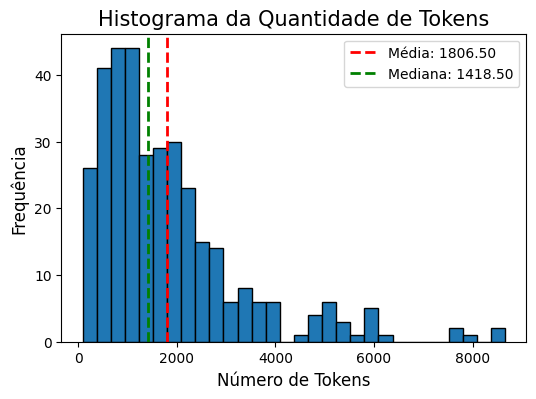

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular média e mediana
mean_value = df['token_count'].mean()
median_value = df['token_count'].median()

# Plotar histograma da quantidade de tokens
plt.figure(figsize=(6, 4))
plt.hist(df['token_count'], bins=30, edgecolor='black')
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Média: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {median_value:.2f}')
plt.xlabel('Número de Tokens', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Histograma da Quantidade de Tokens', fontsize=15)
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Defesa final/Dados DPE-GO/test_data.csv')

# Selecionar um exemplo de cada categoria de 1 a 24
unique_labels = range(1, 25)
examples = []

for label in unique_labels:
    example = df[df['issue_area_label'] == label].head(1)
    examples.append(example)

# Concatenar todos os exemplos em um único DataFrame
examples_df = pd.concat(examples)

# Selecionar as colunas de interesse
selected_columns = examples_df[['issue_area', 'issue_area_label']]

# Exibir o dataset com as colunas selecionadas
from IPython.display import display

display(selected_columns)

print(selected_columns)

,issue_area,issue_area_label
1,AGRAVO,1
104,ALVARA-JUDICIAL-LIBERACAO-DE-CORPO,2
10,APELACAO,3
125,CONSIGNACAO-EM-PAGAMENTO,4
224,CONTRARRAZOES-AO-AGRAVO,5
18,CUMPRIMENTO-DE-SETENCA,6
11,DISSOLUCAO-DE-CONDOMINIO,7
6,EMBARGOS,8
59,EXCECAO-DE-PRE-EXECUTIVIDADE,9
7,EXTINCAO-DE-PUNIBILIDADE,10


                             issue_area  issue_area_label
1                                AGRAVO                 1
104  ALVARA-JUDICIAL-LIBERACAO-DE-CORPO                 2
10                             APELACAO                 3
125            CONSIGNACAO-EM-PAGAMENTO                 4
224             CONTRARRAZOES-AO-AGRAVO                 5
18               CUMPRIMENTO-DE-SETENCA                 6
11             DISSOLUCAO-DE-CONDOMINIO                 7
6                              EMBARGOS                 8
59         EXCECAO-DE-PRE-EXECUTIVIDADE                 9
7              EXTINCAO-DE-PUNIBILIDADE                10
19                        HABEAS-CORPUS                11
5                            IMPUGNACAO                12
4                        INDENIZATORIAS                13
34                    INDULTO-COMUTACAO                14
0                    INTIMACAO-NEGATIVA                15
9                LIVRAMENTO-CONDICIONAL                16
8             

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
import numpy as np
import pandas as pd

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_df['facts'])

labels = filtered_df['issue_area'].unique()
centroids = []

for label in labels:
    indices = filtered_df['issue_area'] == label
    cluster_vectors = X[indices]
    cluster_texts = filtered_df['facts'][indices]

    centroid_vector = cluster_vectors.mean(axis=0)
    centroid_vector = np.asarray(centroid_vector).flatten()

    distances = cosine_distances(cluster_vectors, centroid_vector.reshape(1, -1))
    closest_index = np.argmin(distances)
    centroid_text = cluster_texts.iloc[closest_index]

    centroids.append({'issue_area': label, 'centroid_text': centroid_text})

# Criar DataFrame com os centróides
centroids_df = pd.DataFrame(centroids)

# Exibir as centróides no terminal
print("Centróides:")
print(centroids_df)

# Salvar os resultados em arquivos CSV e Excel
csv_path = '/content/drive/MyDrive/Colab Notebooks/Defesa final/LLMs/mistralai Mixtral-8x22B-Instruct-v0.1-V2/Classificação usando Centroids/Texto-centroids/centroids.csv'
excel_path = '/content/drive/MyDrive/Colab Notebooks/Defesa final/LLMs/mistralai Mixtral-8x22B-Instruct-v0.1-V2/Classificação usando Centroids/Texto-centroids/centroids.xlsx'

centroids_df.to_csv(csv_path, index=False)
centroids_df.to_excel(excel_path, index=False)

print(f"Results saved to {csv_path} and {excel_path}")

Centróides:
                            issue_area  \
0                   INTIMACAO-NEGATIVA   
1                               AGRAVO   
2                       REGISTRO-CIVIL   
3                       INDENIZATORIAS   
4                           IMPUGNACAO   
5                             EMBARGOS   
6             EXTINCAO-DE-PUNIBILIDADE   
7                              OFICIOS   
8               LIVRAMENTO-CONDICIONAL   
9                             APELACAO   
10            DISSOLUCAO-DE-CONDOMINIO   
11              CUMPRIMENTO-DE-SETENCA   
12                       HABEAS-CORPUS   
13                     REMICAO-DE-PENA   
14                 UNIFICACAO-DE-PENAS   
15                   INDULTO-COMUTACAO   
16                PROGRESSAO-DE-REGIME   
17        EXCECAO-DE-PRE-EXECUTIVIDADE   
18           TRANSFERENCIA-DE-EXECUCAO   
19                           USUCAPIAO   
20                    SAIDA-TEMPORARIA   
21  ALVARA-JUDICIAL-LIBERACAO-DE-CORPO   
22            CONSIGNA

In [ ]:
prompt_template_resumo = PromptTemplate(
    input_variables=["texto","classe"],
    template=PROMPT_RESUMO,
)

chain_resumo = prompt_template_resumo | llm | get_label

resumos = []

for label, centroid in zip(labels, centroids):
    resumo = chain_resumo.invoke({'texto': centroid['centroid_text'], 'classe': label})
    resumos.append(resumo)
    print(f"\nResumo para {label}:\n{resumo}\n")


Resumo para INTIMACAO-NEGATIVA:
 A petição trata de uma Intimação Negativa, onde a Defensoria Pública do Estado de Goiás solicita ao Juízo da Vara de Execução de Pena e Medidas Alternativas da Comarca de Goiânia que o sentenciado, cujo nome foi anonimizado, compareça a uma audiência admonitória. A Defensoria Pública, representada pela defensora pública


Resumo para AGRAVO:
 A petição trata de um agravo interposto pela defensoria pública em nome de um indivíduo que cumpriu integralmente uma pena privativa de liberdade, mas não pôde pagar uma multa criminal. A defensoria argumenta que a decisão que indeferiu o pedido de declaração de extinção de punibilidade pelo integral cumprimento das sanções impostas é err


Resumo para REGISTRO-CIVIL:
 A petição trata de uma solicitação de REGISTRO-CIVIL para a retificação de um registro civil. A requerente, que se encontra em situação de hipossuficiência econômica, solicita a concessão de gratuidade da justiça, com base no artigo LXXIV da Constit

In [ ]:
# classifica os textos diretamente usando o PROMPT_CLASSIFICACAO, usando textos centróides

import re
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import unicodedata

# Função para normalizar texto
def normalize_text(text):
    """
    Normaliza o texto para comparação.
    Converte para minúsculas e remove espaços extras.
    """
    text = text.lower()  # Converte para minúsculas
    text = re.sub(r'\s+', ' ', text).strip()  # Remove espaços extras
    return text

# Função para remover acentos
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return "".join([c for c in nfkd_form if not unicodedata.combining(c)])

# Função para limpar e normalizar a categoria
def clean_category(category):
    category = re.sub(r'[^a-zA-Z0-9\-]', '', category)  # Remove caracteres especiais
    category = re.sub(r'\s+', '-', category).strip()  # Substitui espaços por traços e remove espaços extras
    return category.upper()  # Converte para maiúsculas

# Função para encontrar a melhor correspondência
def get_best_match(result, valid_labels):
    result = clean_category(result)  # Limpar e normalizar a categoria
    result = remove_accents(result).strip().upper()

    best_match = None
    best_score = -1

    for label in valid_labels:
        cleaned_label = clean_category(remove_accents(label.strip().upper()))
        if result == cleaned_label:
            return label  # Retorna a correspondência exata imediatamente
        score = len(set(result) & set(cleaned_label)) / len(set(result) | set(cleaned_label))  # Jaccard similarity
        if score > best_score:
            best_score = score
            best_match = label

    return best_match

# Inicializar variáveis para rastreamento das métricas
y_true = []
y_pred = []

# Variáveis para rastrear a acurácia
correct_count = 0
total_count = 0

# Lista para armazenar os resultados
results = []

# Lista de rótulos válidos
valid_labels = filtered_df['issue_area'].unique().tolist()

# Preparar o modelo para classificação com centróides
prompt_template_classificacao = PromptTemplate(
    input_variables=["texto"],
    template=PROMPT_CLASSIFICACAO,
)

chain_classificacao = prompt_template_classificacao | llm | get_label

# Classificação usando centróides
for index, row in filtered_df.iterrows():
    centroid_text = centroids_df[centroids_df['issue_area'] == row['issue_area']]['centroid_text'].values[0]
    prompt_with_classificacao = prompt_template_classificacao.format(texto=centroid_text)
    result = chain_classificacao.invoke({'texto': centroid_text}).strip()  # Remover espaços em branco extras

    # Normalizar textos para comparação e remover acentos
    normalized_label = clean_category(remove_accents(row['issue_area'].strip().upper()))
    normalized_result = get_best_match(result, valid_labels)  # Garantir que a saída seja uma das classes válidas

    # Verificar se a previsão é correta
    is_correct = normalized_label == clean_category(remove_accents(normalized_result.strip().upper()))

    # Imprimir o resultado retornado e a etiqueta esperada para depuração
    print(f'Real: {row["issue_area"]}, Previsto: {normalized_result}, Correto: {is_correct}')

    y_true.append(normalized_label)
    y_pred.append(clean_category(remove_accents(normalized_result.strip().upper())))

    total_count += 1
    if is_correct:
        correct_count += 1

    # Calcular métricas intermediárias
    intermediate_precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    intermediate_recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    intermediate_f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # Exibir métricas intermediárias
    print(f'Progresso: {index + 1}/{len(filtered_df)}')
    print(f'Acurácia até agora: {correct_count / total_count * 100:.2f}%')
    print(f'Precisão até agora: {intermediate_precision * 100:.2f}%')
    print(f'Recall até agora: {intermediate_recall * 100:.2f}%')
    print(f'F1-score até agora: {intermediate_f1 * 100:.2f}%')
    print()  # Adiciona uma linha em branco

    # Armazenar os resultados na lista
    results.append({
        'Real': row['issue_area'],
        'Previsto': normalized_result,
        'Correto': is_correct
    })

# Calcular métricas finais
final_precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
final_recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
final_f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print(f'Acurácia final: {correct_count / total_count * 100:.2f}%')
print(f'Precisão final: {final_precision * 100:.2f}%')
print(f'Recall final: {final_recall * 100:.2f}%')
print(f'F1-score final: {final_f1 * 100:.2f}%')

# Ajustar a lista de rótulos
unique_labels = list(set(y_true + y_pred))
unique_labels.sort()  # Garantir que os rótulos estejam ordenados

# Gerar relatório de classificação
classification_report_str = classification_report(y_true, y_pred, labels=unique_labels)
print(classification_report_str)

# Salvar relatório de classificação em arquivos CSV e Excel
report_dict = classification_report(y_true, y_pred, labels=unique_labels, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

report_csv_path = '/content/drive/MyDrive/Colab Notebooks/Defesa final/LLMs/mistralai Mixtral-8x22B-Instruct-v0.1-V2/Classificação usando Centroids/Classificações/classification_report_centroids.csv'
report_excel_path = '/content/drive/MyDrive/Colab Notebooks/Defesa final/LLMs/mistralai Mixtral-8x22B-Instruct-v0.1-V2/Classificação usando Centroids/Classificações/classification_report_centroids.xlsx'

report_df.to_csv(report_csv_path, index=True)
report_df.to_excel(report_excel_path, index=True)

print(f'Relatório de classificação salvo em {report_csv_path} e {report_excel_path}')

# Criar um DataFrame a partir dos resultados
results_df = pd.DataFrame(results)

# Salvar os resultados em arquivos CSV e Excel
csv_path = '/content/drive/MyDrive/Colab Notebooks/Defesa final/LLMs/mistralai Mixtral-8x22B-Instruct-v0.1-V2/Classificação usando Centroids/Classificações/classificacoes_centroids.csv'
excel_path = '/content/drive/MyDrive/Colab Notebooks/Defesa final/LLMs/mistralai Mixtral-8x22B-Instruct-v0.1-V2/Classificação usando Centroids/Classificações/classificacoes_centroids.xlsx'

results_df.to_csv(csv_path, index=False)
results_df.to_excel(excel_path, index=False)

print(f'Resultados salvos em {csv_path} e {excel_path}')

Real: INTIMACAO-NEGATIVA, Previsto: INTIMACAO-NEGATIVA, Correto: True
Progresso: 1/346
Acurácia até agora: 100.00%
Precisão até agora: 100.00%
Recall até agora: 100.00%
F1-score até agora: 100.00%

Real: AGRAVO, Previsto: AGRAVO, Correto: True
Progresso: 2/346
Acurácia até agora: 100.00%
Precisão até agora: 100.00%
Recall até agora: 100.00%
F1-score até agora: 100.00%

Real: REGISTRO-CIVIL, Previsto: REGISTRO-CIVIL, Correto: True
Progresso: 3/346
Acurácia até agora: 100.00%
Precisão até agora: 100.00%
Recall até agora: 100.00%
F1-score até agora: 100.00%

Real: AGRAVO, Previsto: AGRAVO, Correto: True
Progresso: 4/346
Acurácia até agora: 100.00%
Precisão até agora: 100.00%
Recall até agora: 100.00%
F1-score até agora: 100.00%

Real: INDENIZATORIAS, Previsto: APELACAO, Correto: False
Progresso: 5/346
Acurácia até agora: 80.00%
Precisão até agora: 80.00%
Recall até agora: 80.00%
F1-score até agora: 80.00%

Real: IMPUGNACAO, Previsto: IMPUGNACAO, Correto: True
Progresso: 6/346
Acurácia até

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

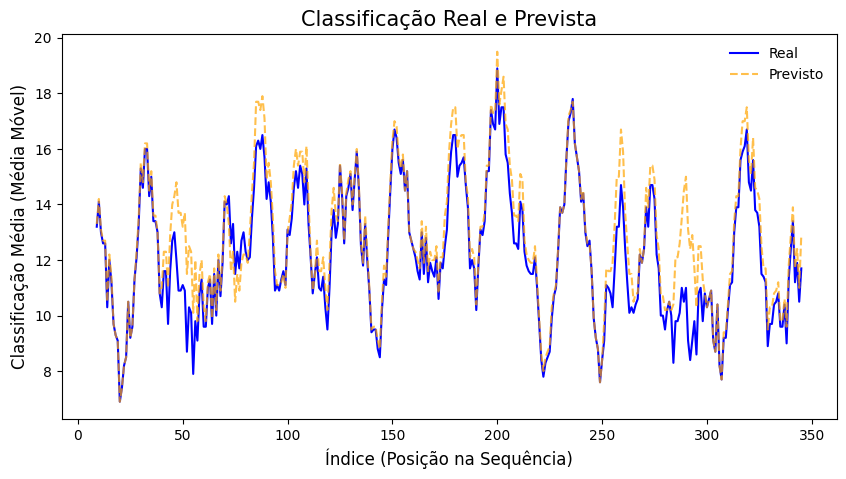

Acurácia Total: 79.19%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter categorias para números
label_mapping = {label: idx for idx, label in enumerate(set(y_true + y_pred))}
numeric_labels_true = [label_mapping[label] for label in y_true]
numeric_labels_pred = [label_mapping[label] for label in y_pred]

df_comparison = pd.DataFrame({'Real': numeric_labels_true, 'Previsto': numeric_labels_pred})

# Calcular a acurácia
accuracy = (df_comparison['Real'] == df_comparison['Previsto']).mean()

# Calcular a média móvel para suavizar as curvas
df_comparison['Real_Smooth'] = df_comparison['Real'].rolling(window=10).mean()
df_comparison['Previsto_Smooth'] = df_comparison['Previsto'].rolling(window=10).mean()

# Criar o gráfico de linhas
plt.figure(figsize=(10, 5))  # Tamanho ajustado do gráfico
plt.plot(df_comparison.index, df_comparison['Real_Smooth'], label='Real', linestyle='-', color='blue')
plt.plot(df_comparison.index, df_comparison['Previsto_Smooth'], label='Previsto', linestyle='--', color='orange', alpha=0.7)
plt.xlabel('Índice (Posição na Sequência)', fontsize=12)  # Eixo X representando a posição na sequência
plt.ylabel('Classificação Média (Média Móvel)', fontsize=12)  # Eixo Y representando a média móvel das classificações
plt.title('Classificação Real e Prevista', fontsize=15)
plt.legend(loc='upper right', fontsize=10, frameon=False)  # Reduzir o tamanho da fonte da legenda e remover o quadro
plt.show()

# Exibir a acurácia
print(f'Acurácia Total: {accuracy:.2%}')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificar os rótulos de string para valores numéricos
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

# Verificar o mapeamento
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'AGRAVO': 0, 'ALVARA-JUDICIAL-LIBERACAO-DE-CORPO': 1, 'APELACAO': 2, 'CONSIGNACAO-EM-PAGAMENTO': 3, 'CONTRARRAZOES-AO-AGRAVO': 4, 'CUMPRIMENTO-DE-SETENCA': 5, 'DISSOLUCAO-DE-CONDOMINIO': 6, 'EMBARGOS': 7, 'EXCECAO-DE-PRE-EXECUTIVIDADE': 8, 'EXTINCAO-DE-PUNIBILIDADE': 9, 'HABEAS-CORPUS': 10, 'IMPUGNACAO': 11, 'INDENIZATORIAS': 12, 'INDULTO-COMUTACAO': 13, 'INTIMACAO-NEGATIVA': 14, 'LIVRAMENTO-CONDICIONAL': 15, 'OFICIOS': 16, 'PROGRESSAO-DE-REGIME': 17, 'REGISTRO-CIVIL': 18, 'REMICAO-DE-PENA': 19, 'SAIDA-TEMPORARIA': 20, 'TRANSFERENCIA-DE-EXECUCAO': 21, 'UNIFICACAO-DE-PENAS': 22, 'USUCAPIAO': 23}


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarizar os rótulos para o cálculo do AUC-ROC
y_true_binarized = label_binarize(y_true, classes=unique_labels)
y_pred_binarized = label_binarize(y_pred, classes=unique_labels)

# Calcular o AUC-ROC para cada classe
roc_auc_scores = {}
for i, label in enumerate(unique_labels):
    roc_auc_scores[label] = roc_auc_score(y_true_binarized[:, i], y_pred_binarized[:, i])

# Calcular a média do AUC-ROC
average_auc_roc = sum(roc_auc_scores.values()) / len(roc_auc_scores)

# Imprimir as pontuações AUC-ROC
print("Pontuações AUC-ROC por classe:")
for label, score in roc_auc_scores.items():
    print(f"{label}: {score:.2f}")

print(f"Média AUC-ROC: {average_auc_roc:.2f}")

Pontuações AUC-ROC por classe:
AGRAVO: 0.93
ALVARA-JUDICIAL-LIBERACAO-DE-CORPO: 1.00
APELACAO: 0.95
CONSIGNACAO-EM-PAGAMENTO: 1.00
CONTRARRAZOES-AO-AGRAVO: 1.00
CUMPRIMENTO-DE-SETENCA: 0.90
DISSOLUCAO-DE-CONDOMINIO: 1.00
EMBARGOS: 1.00
EXCECAO-DE-PRE-EXECUTIVIDADE: 1.00
EXTINCAO-DE-PUNIBILIDADE: 0.50
HABEAS-CORPUS: 1.00
IMPUGNACAO: 0.99
INDENIZATORIAS: 0.50
INDULTO-COMUTACAO: 1.00
INTIMACAO-NEGATIVA: 1.00
LIVRAMENTO-CONDICIONAL: 1.00
OFICIOS: 1.00
PROGRESSAO-DE-REGIME: 0.50
REGISTRO-CIVIL: 1.00
REMICAO-DE-PENA: 1.00
SAIDA-TEMPORARIA: 1.00
TRANSFERENCIA-DE-EXECUCAO: 1.00
UNIFICACAO-DE-PENAS: 1.00
USUCAPIAO: 1.00
Média AUC-ROC: 0.93


In [ ]:
from sklearn.metrics import average_precision_score

# Calcular o AUC-PR para cada classe
pr_auc_scores = {}
for i, label in enumerate(unique_labels):
    pr_auc_scores[label] = average_precision_score(y_true_binarized[:, i], y_pred_binarized[:, i])

# Calcular a média do AUC-PR
average_auc_pr = sum(pr_auc_scores.values()) / len(pr_auc_scores)

# Imprimir as pontuações AUC-PR
print("Pontuações AUC-PR por classe:")
for label, score in pr_auc_scores.items():
    print(f"{label}: {score:.2f}")

print(f"Média AUC-PR: {average_auc_pr:.2f}")

Pontuações AUC-PR por classe:
AGRAVO: 0.53
ALVARA-JUDICIAL-LIBERACAO-DE-CORPO: 1.00
APELACAO: 0.51
CONSIGNACAO-EM-PAGAMENTO: 1.00
CONTRARRAZOES-AO-AGRAVO: 1.00
CUMPRIMENTO-DE-SETENCA: 0.65
DISSOLUCAO-DE-CONDOMINIO: 1.00
EMBARGOS: 1.00
EXCECAO-DE-PRE-EXECUTIVIDADE: 1.00
EXTINCAO-DE-PUNIBILIDADE: 0.14
HABEAS-CORPUS: 1.00
IMPUGNACAO: 0.98
INDENIZATORIAS: 0.04
INDULTO-COMUTACAO: 1.00
INTIMACAO-NEGATIVA: 1.00
LIVRAMENTO-CONDICIONAL: 0.96
OFICIOS: 1.00
PROGRESSAO-DE-REGIME: 0.01
REGISTRO-CIVIL: 1.00
REMICAO-DE-PENA: 1.00
SAIDA-TEMPORARIA: 0.50
TRANSFERENCIA-DE-EXECUCAO: 1.00
UNIFICACAO-DE-PENAS: 1.00
USUCAPIAO: 1.00
Média AUC-PR: 0.80


In [ ]:
from sklearn.metrics import matthews_corrcoef

# Calcular MCC
mcc_value = matthews_corrcoef(y_true, y_pred)

# Print MCC
print(f"MCC: {mcc_value:.2f}")

MCC: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


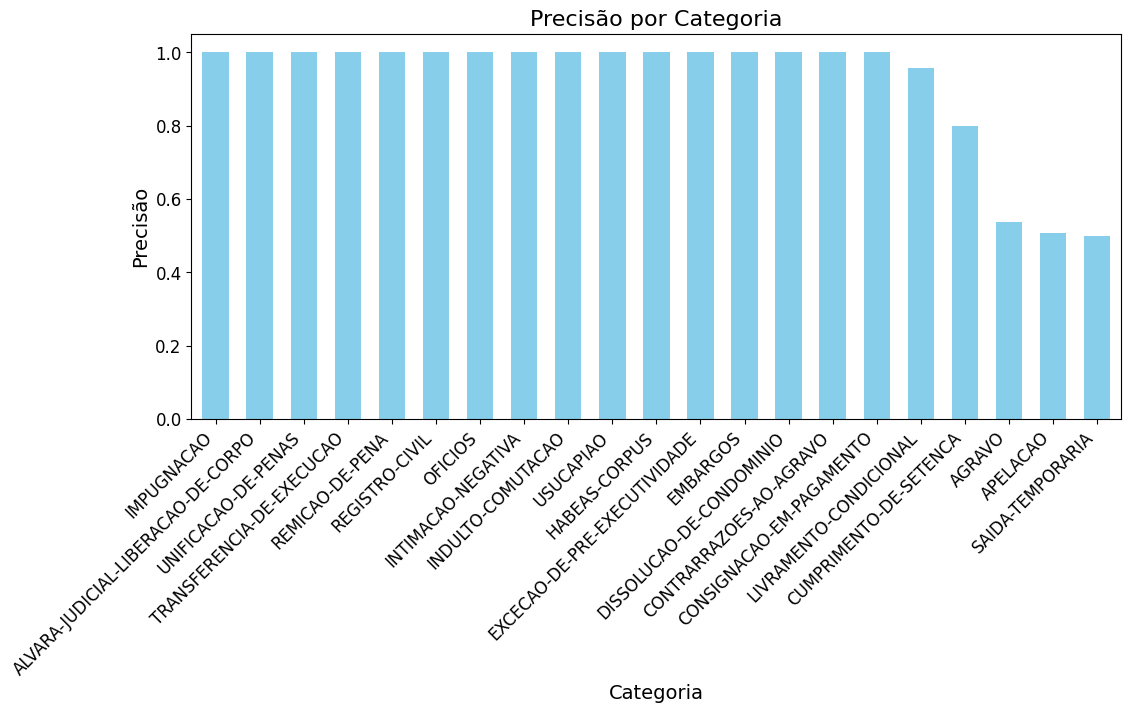

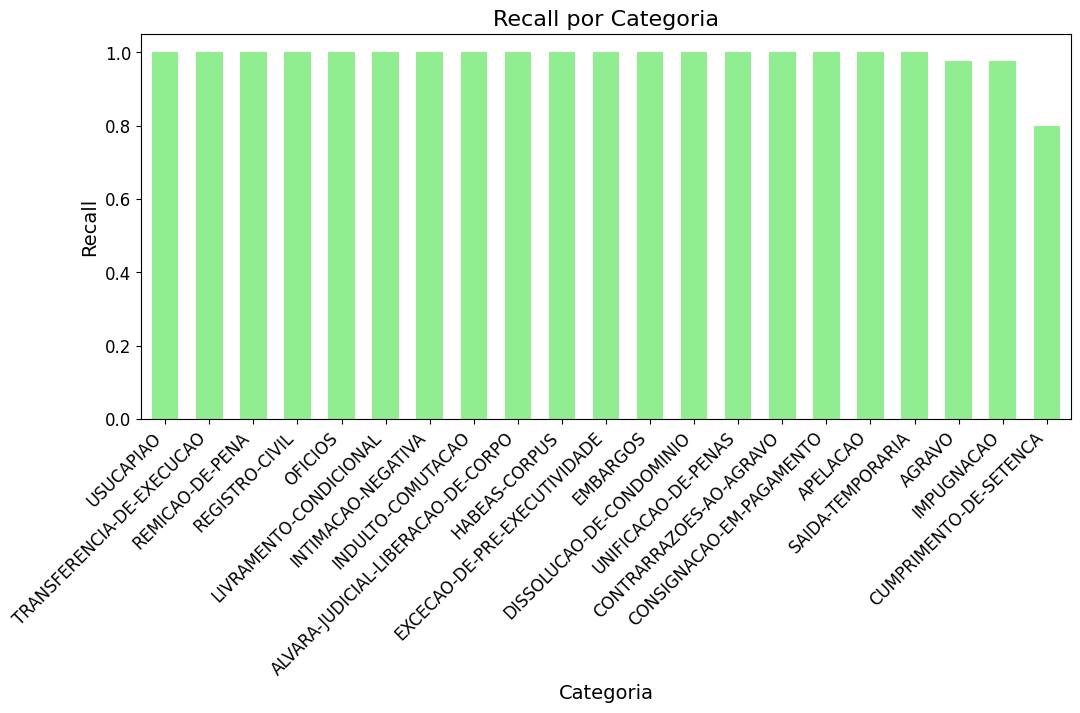

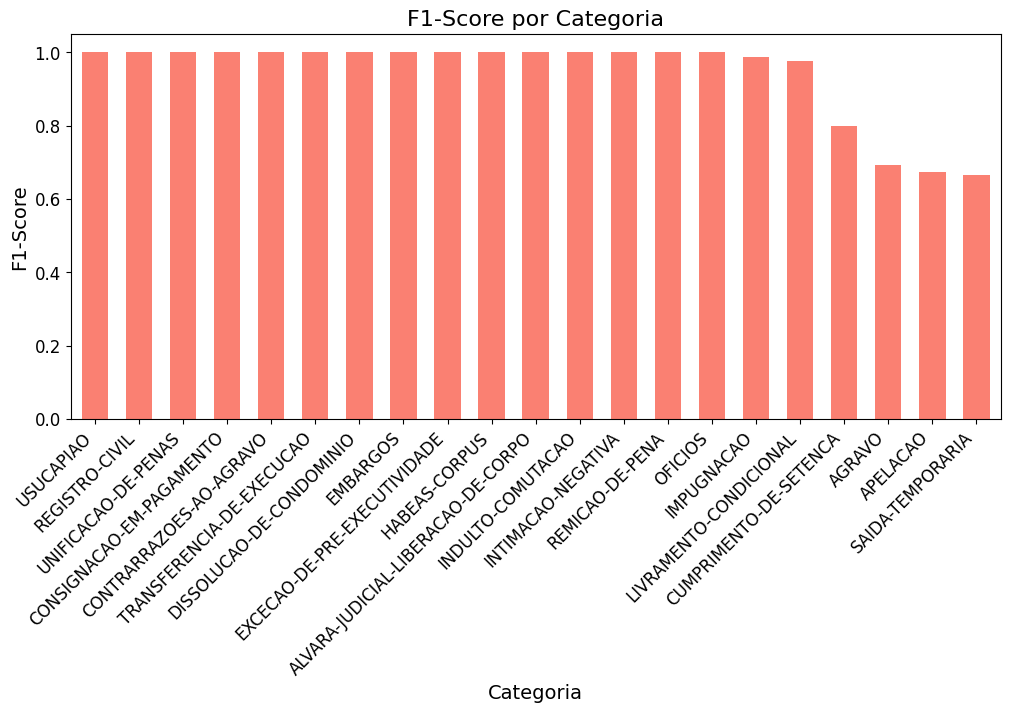

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Calcular o relatório de classificação
report_dict = classification_report(y_true, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

# Remover categorias com resultados zero e médias indesejadas
df_report = df_report[(df_report['precision'] > 0) | (df_report['recall'] > 0) | (df_report['f1-score'] > 0)]
df_report = df_report.drop(['accuracy', 'macro avg', 'weighted avg', 'micro avg'], errors='ignore')

# Ajustar a largura das barras
bar_width = 0.6

# Ordenar os valores para visualização pela precisão
df_report_precision = df_report.sort_values(by='precision', ascending=False)

# Precisão
plt.figure(figsize=(12, 5))
df_report_precision['precision'].plot(kind='bar', color='skyblue', width=bar_width)
plt.title('Precisão por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Precisão', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.show()

# Ordenar os valores para visualização pelo recall
df_report_recall = df_report.sort_values(by='recall', ascending=False)

# Recall
plt.figure(figsize=(12, 5))
df_report_recall['recall'].plot(kind='bar', color='lightgreen', width=bar_width)
plt.title('Recall por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.show()

# Ordenar os valores para visualização pelo f1-score
df_report_f1 = df_report.sort_values(by='f1-score', ascending=False)

# F1-Score
plt.figure(figsize=(12, 5))
df_report_f1['f1-score'].plot(kind='bar', color='salmon', width=bar_width)
plt.title('F1-Score por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('F1-Score', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
plt.show()

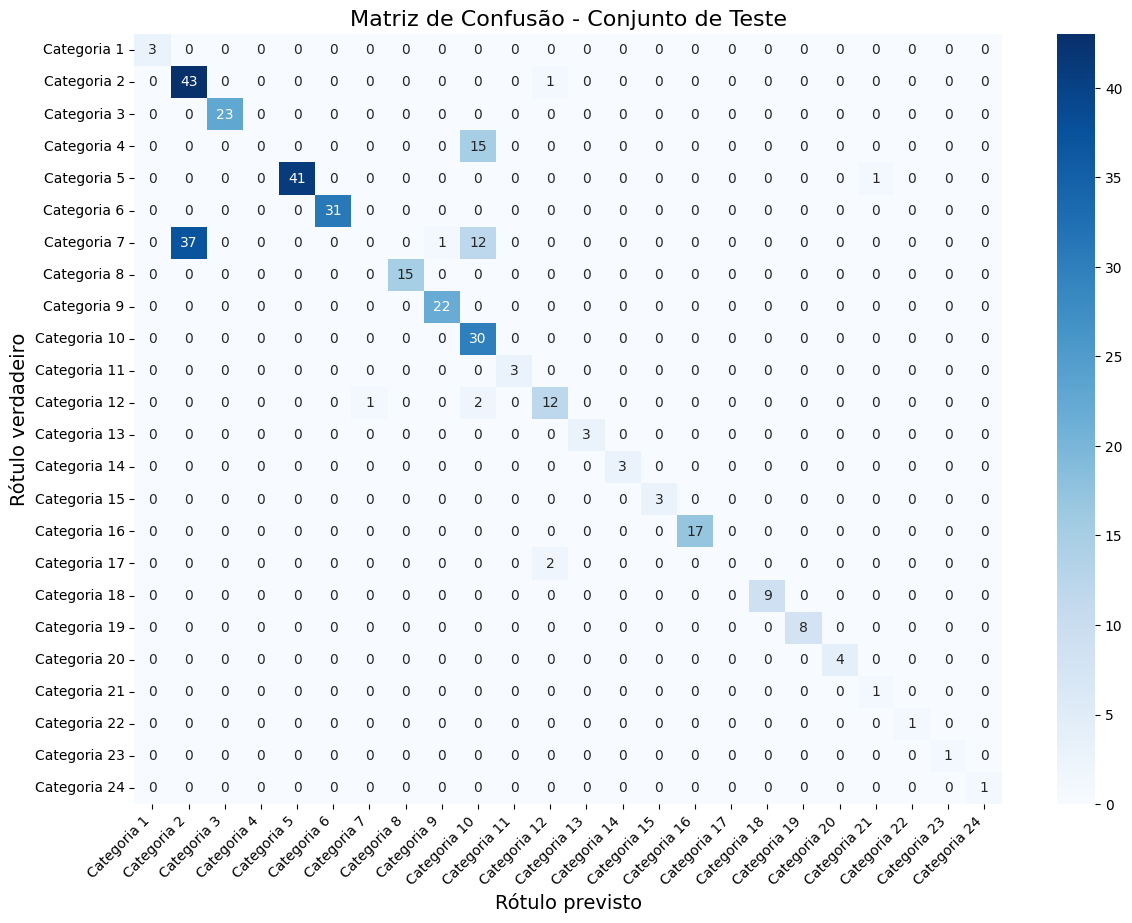

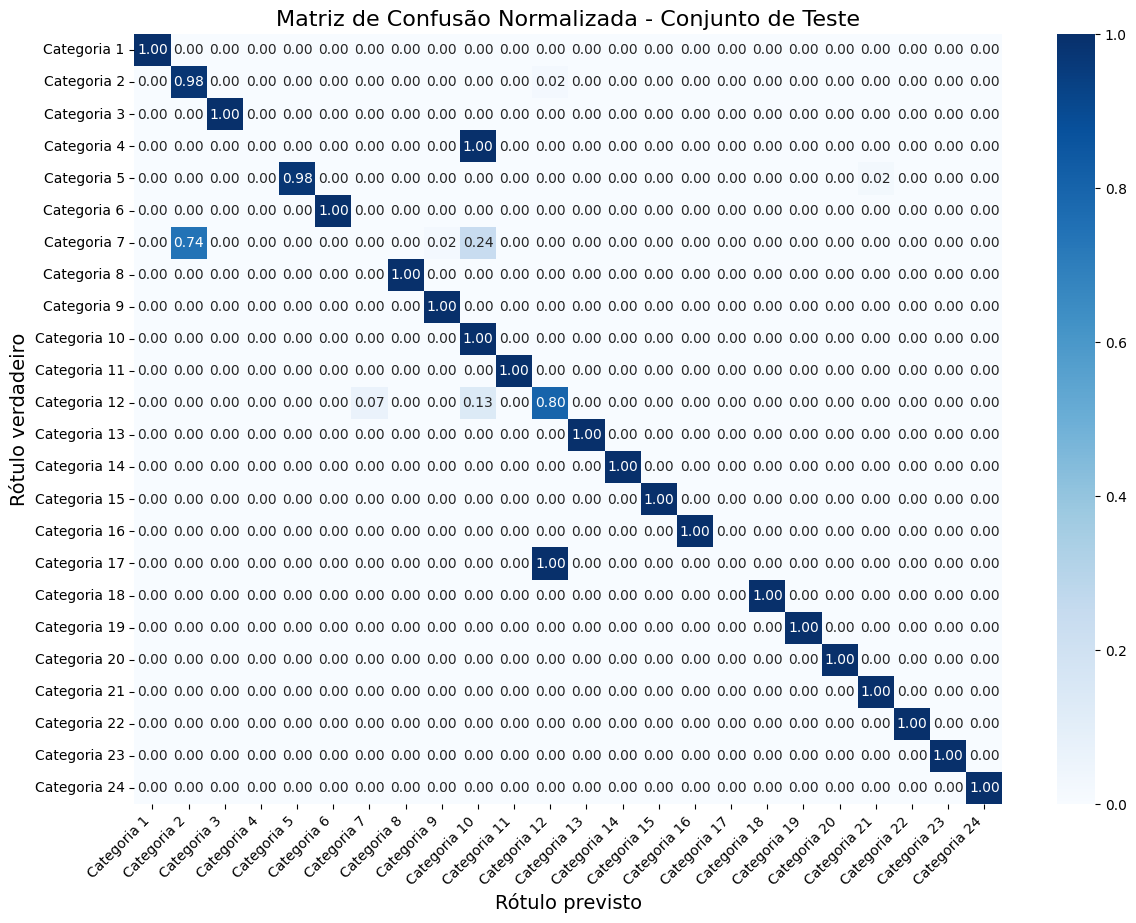

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

df_sample = pd.DataFrame({
    'issue_area': y_true,
    'resultados': y_pred
})

# Calcular a matriz de confusão
cm = confusion_matrix(df_sample['issue_area'], df_sample['resultados'], labels=df_sample['issue_area'].unique())

# Normalizar a matriz de confusão
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Criar rótulos numéricos para as categorias
categories = [f'Categoria {i+1}' for i in range(len(df_sample['issue_area'].unique()))]

# Criar DataFrames para as matrizes de confusão
df_cm = pd.DataFrame(cm, index=categories, columns=categories)
df_cm_normalized = pd.DataFrame(cm_normalized, index=categories, columns=categories)

# Definir o diretório de saída
output_dir = '/content/drive/MyDrive/Colab Notebooks/Defesa final/LLMs/mistralai Mixtral-8x22B-Instruct-v0.1-V2/Classificação usando Centroids/Matriz-confusão'

# Salvar as matrizes de confusão em CSV e Excel
df_cm.to_csv(f'{output_dir}/matriz_de_confusao.csv', index=True)
df_cm_normalized.to_csv(f'{output_dir}/matriz_de_confusao_normalizada.csv', index=True)

df_cm.to_excel(f'{output_dir}/matriz_de_confusao.xlsx', index=True)
df_cm_normalized.to_excel(f'{output_dir}/matriz_de_confusao_normalizada.xlsx', index=True)

# Plotar a matriz de confusão normal
plt.figure(figsize=(14, 10))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Rótulo previsto', fontsize=14)
plt.ylabel('Rótulo verdadeiro', fontsize=14)
plt.title('Matriz de Confusão - Conjunto de Teste', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Plotar a matriz de confusão normalizada
plt.figure(figsize=(14, 10))
sns.heatmap(df_cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Rótulo previsto', fontsize=14)
plt.ylabel('Rótulo verdadeiro', fontsize=14)
plt.title('Matriz de Confusão Normalizada - Conjunto de Teste', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()